In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import os
import uuid  # To generate a unique ID for each file
from tqdm import tqdm

In [2]:
chromosomes = ['chr1', 'chr2', 'chr3', 'chr4', 'chr5', 'chr6', 'chr7', 'chr8', 'chr9', 'chr10', 
               'chr11', 'chr12', 'chr13', 'chr14', 'chr15', 'chr16', 'chr17', 'chr18', 'chr19', 
               'chr20', 'chr21', 'chr22', 'chrX']

In [28]:
def parse_file(file_path):
    data = pd.read_csv(file_path, sep='\t', header=None, names=['chr1', 'pos1', 'chr2', 'pos2', 'interaction'])
    total_sum = data['interaction'].sum()
    cis_contacts = data[data['chr1'] == data['chr2']]['interaction'].sum()
    trans_contacts = data[data['chr1'] != data['chr2']]['interaction'].sum()
    if trans_contacts == 0:
        cis_trans_ratio = float('inf')
    else:
        cis_trans_ratio = cis_contacts / trans_contacts

    if total_sum >= 1000 and cis_trans_ratio >= 1:
        return data
    print(f"SKIPPED {file_path}")
    return None

def find_range(data, chr):
    range_pos1 = data[data['chr1'] == chr]["pos1"]
    range_pos2 = data[data['chr2'] == chr]["pos2"]
    
    max_pos1 = range_pos1.max()
    min_pos1 = range_pos1.min() 
    max_pos2 = range_pos2.max() 
    min_pos2 = range_pos2.min() 

    max_range = max(max_pos1, max_pos2) - min(min_pos1, min_pos2)
    return int(max_range / 1000000) + 1, min(min_pos1, min_pos2)


def load_txt_to_matrix(data):
    list_of_chromosomes = []
    for chr in chromosomes:
        chr_range, min_position = find_range(data, chr)
        X_chr = np.zeros((chr_range, chr_range), dtype=int)  # Ensure matrix dimensions match chr_range

        for _, row in data[(data['chr1'] == chr) & (data['chr2'] == chr)].iterrows():
            if row['interaction'] > 0:
                pos1_index = int((row['pos1'] - min_position) / 1000000)
                pos2_index = int((row['pos2'] - min_position) / 1000000)
                X_chr[pos1_index, pos2_index] = 1

        list_of_chromosomes.append(X_chr)
    return list_of_chromosomes

In [29]:
sample = parse_file("GM12878/ml3_AAGCGACC-ACCTCTTG.txt")
sample_matrix_list = load_txt_to_matrix(sample)

In [31]:
for i in range(23):
    print(sample_matrix_list[i].shape)

(246, 246)
(243, 243)
(198, 198)
(191, 191)
(181, 181)
(171, 171)
(160, 160)
(144, 144)
(141, 141)
(135, 135)
(135, 135)
(134, 134)
(95, 95)
(88, 88)
(81, 81)
(90, 90)
(82, 82)
(78, 78)
(59, 59)
(61, 61)
(34, 34)
(33, 33)
(153, 153)


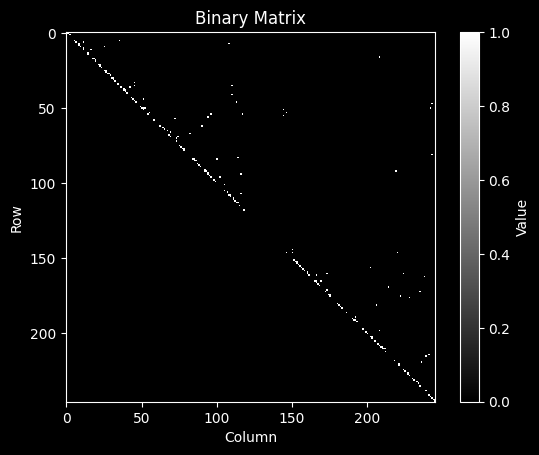

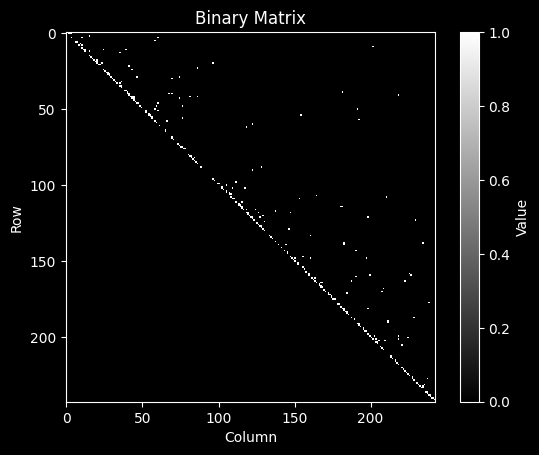

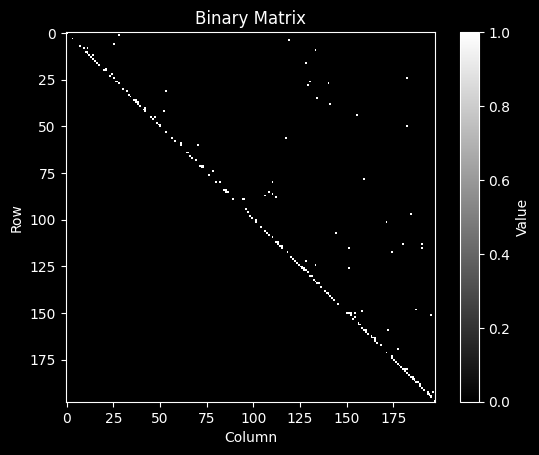

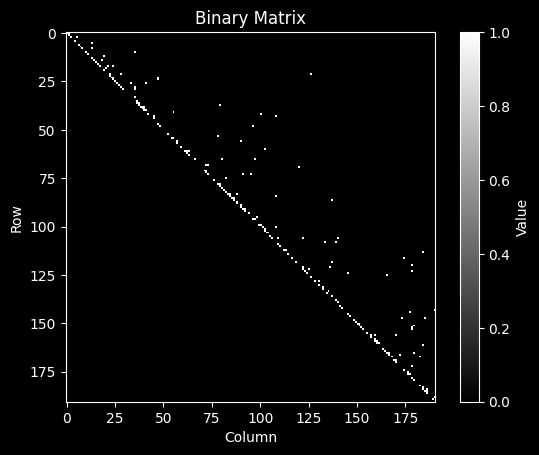

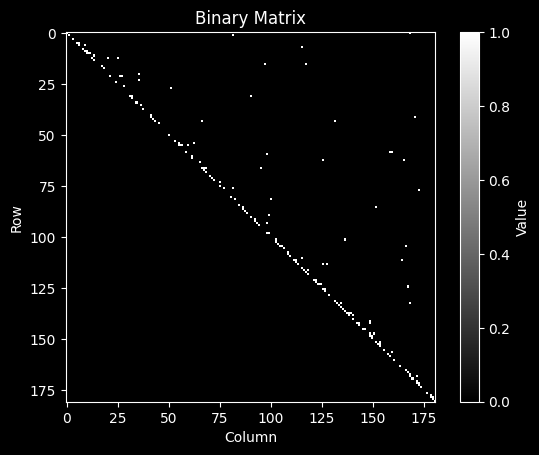

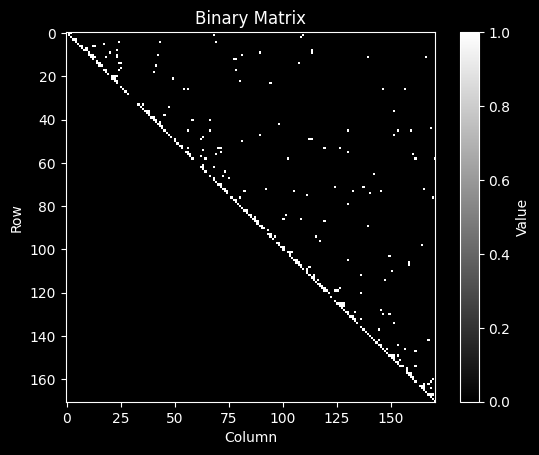

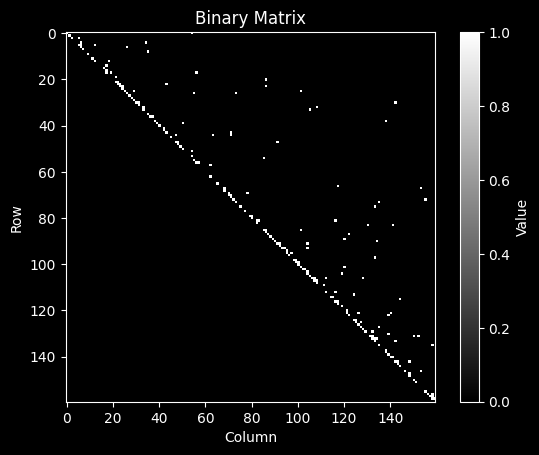

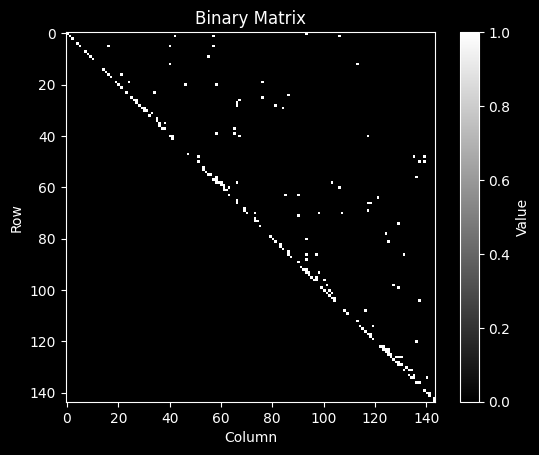

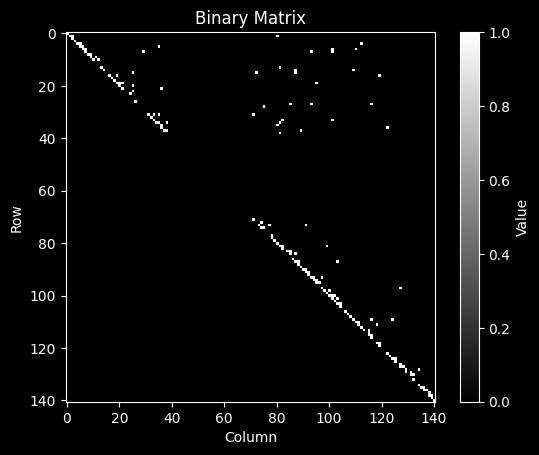

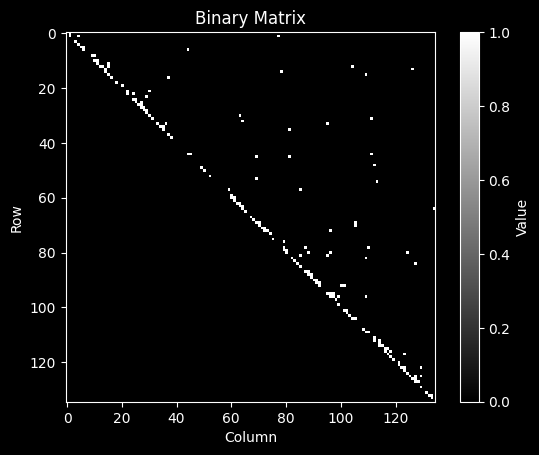

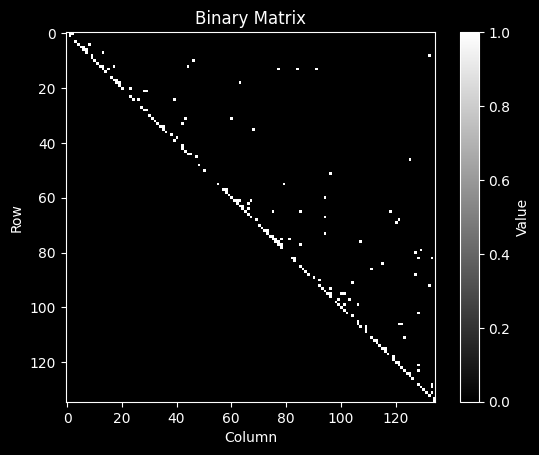

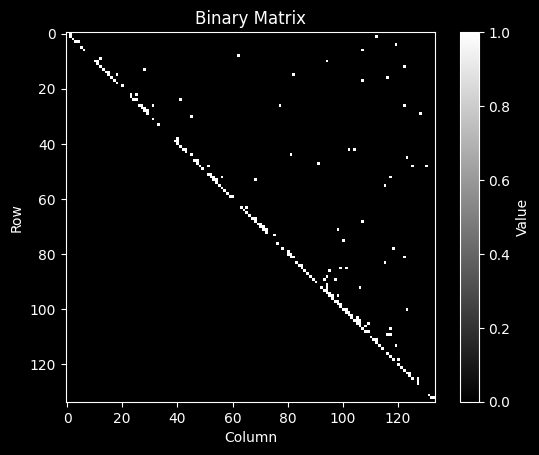

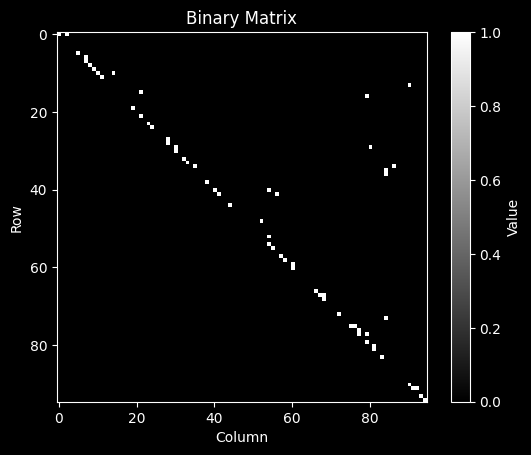

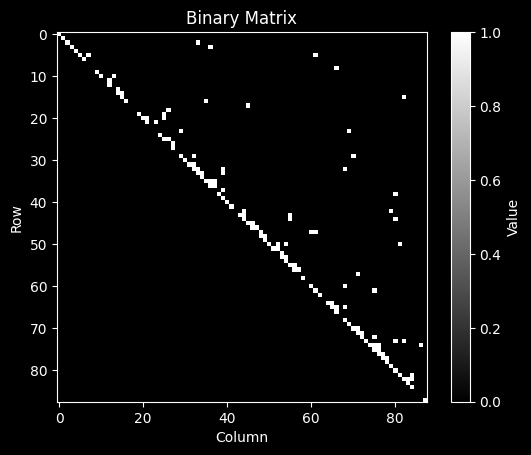

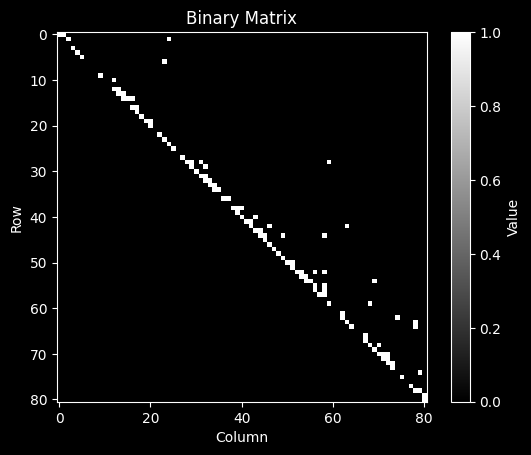

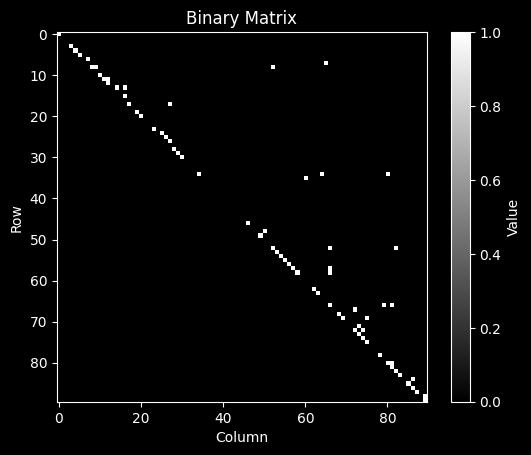

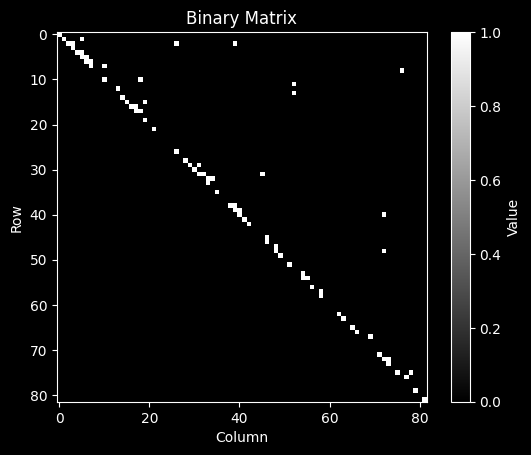

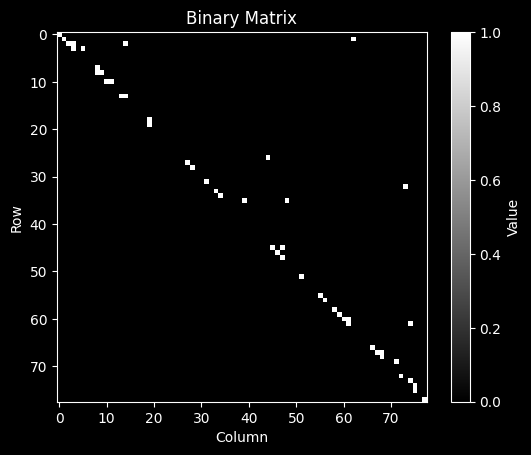

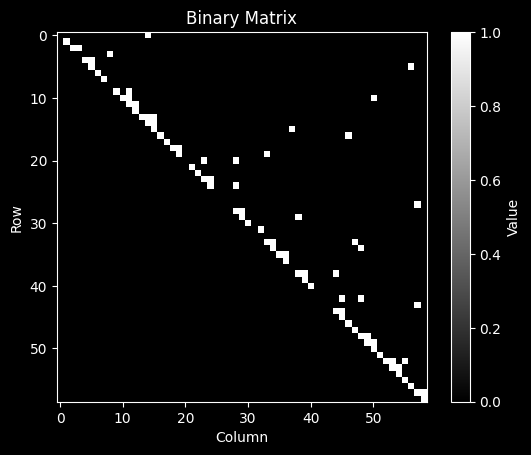

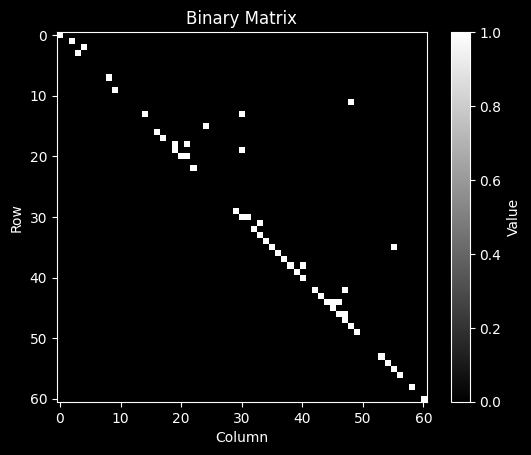

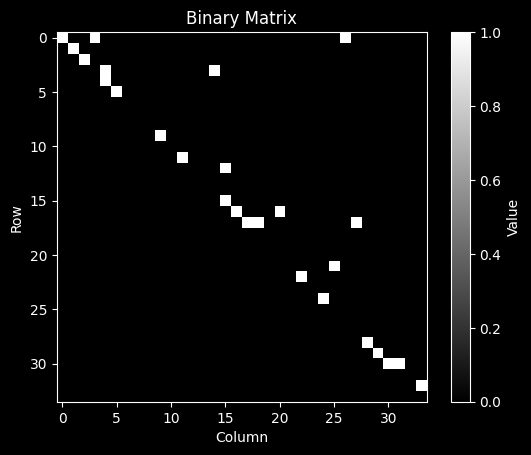

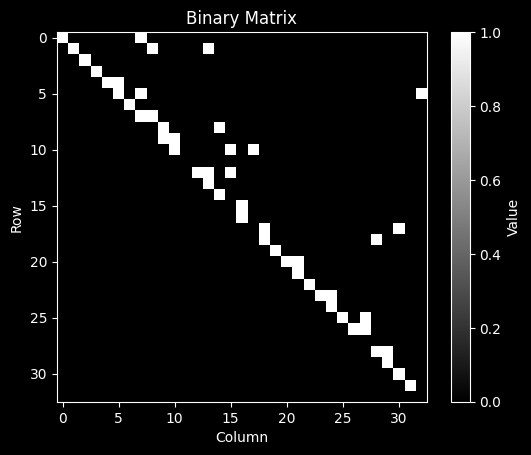

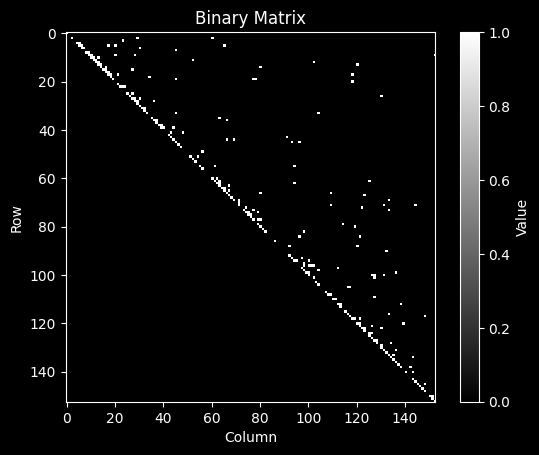

In [32]:
for i in range(23):
    # Plotting the matrix
    plt.imshow(sample_matrix_list[i], cmap='gray', interpolation='nearest')
    plt.colorbar(label="Value")
    plt.title("Binary Matrix")
    plt.xlabel("Column")
    plt.ylabel("Row")
    plt.show()